In [ ]:
#mounted to google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# 1. Data Collection

*   Read dataset
*   Import necessary libraries and packages



In [ ]:
# Import Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Import the common library modules
import numpy as np
import pandas as pd #handling tabular data
import matplotlib.pyplot as plt #Plotting Graph
import seaborn as sns #Visualization module

#import sklearn tools
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import metrics
%matplotlib inline

#import keras modules
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [ ]:
#Define a variable for content of the file
data = pd.read_csv('drive/My Drive/FYP/c2c/cell2celltrain.csv')

In [ ]:
#Check the type of data
type(data)

pandas.core.frame.DataFrame

# 2. Preprocessing - Cleaning and Pruning


# Data Visualization

In [ ]:
# view the first 5 rows in the data
data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [ ]:
# view the index of the data
data.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [ ]:
# View the info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [ ]:
#view the numeric features of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,51047.0,3.201957e+06,116905.561666,3000002.00,3100632.00,3201534.00,3305376.000,3399994.00
MonthlyRevenue,50891.0,5.883449e+01,44.507336,-6.17,33.61,48.46,71.065,1223.38
MonthlyMinutes,50891.0,5.256534e+02,529.871063,0.00,158.00,366.00,723.000,7359.00
TotalRecurringCharge,50891.0,4.683009e+01,23.848871,-11.00,30.00,45.00,60.000,400.00
DirectorAssistedCalls,50891.0,8.952290e-01,2.228546,0.00,0.00,0.25,0.990,159.39
OverageMinutes,50891.0,4.002778e+01,96.588076,0.00,0.00,3.00,41.000,4321.00
RoamingCalls,50891.0,1.236244e+00,9.818294,0.00,0.00,0.00,0.300,1112.40
PercChangeMinutes,50680.0,-1.154791e+01,257.514772,-3875.00,-83.00,-5.00,66.000,5192.00
PercChangeRevenues,50680.0,-1.191985e+00,39.574915,-1107.70,-7.10,-0.30,1.600,2483.50
DroppedCalls,51047.0,6.011489e+00,9.043955,0.00,0.70,3.00,7.700,221.70


In [ ]:
#view the data type of the data
data.dtypes

CustomerID                     int64
Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
H

In [ ]:
#Group the column datatypes
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['CustomerID', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating'], float64: ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2'], object: ['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice', 

In [ ]:
#Differentiate between numerical columns and non-numerical columns for data
num_cols = data.columns[data.dtypes != 'object']
obj_cols = data.columns[data.dtypes == 'object']

In [ ]:
#view numeric columns
num_cols

Index(['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls',
       'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating'],
      dtype='object')

In [ ]:
#view object columns
obj_cols

Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

In [ ]:
#view categorical variable
data.select_dtypes(include=['category', object]).columns

Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

# Handle Missing data


In [ ]:
# check missing data
print('Any missing value: ', data.isnull().values.any())

Any missing value:  True


<Axes: >

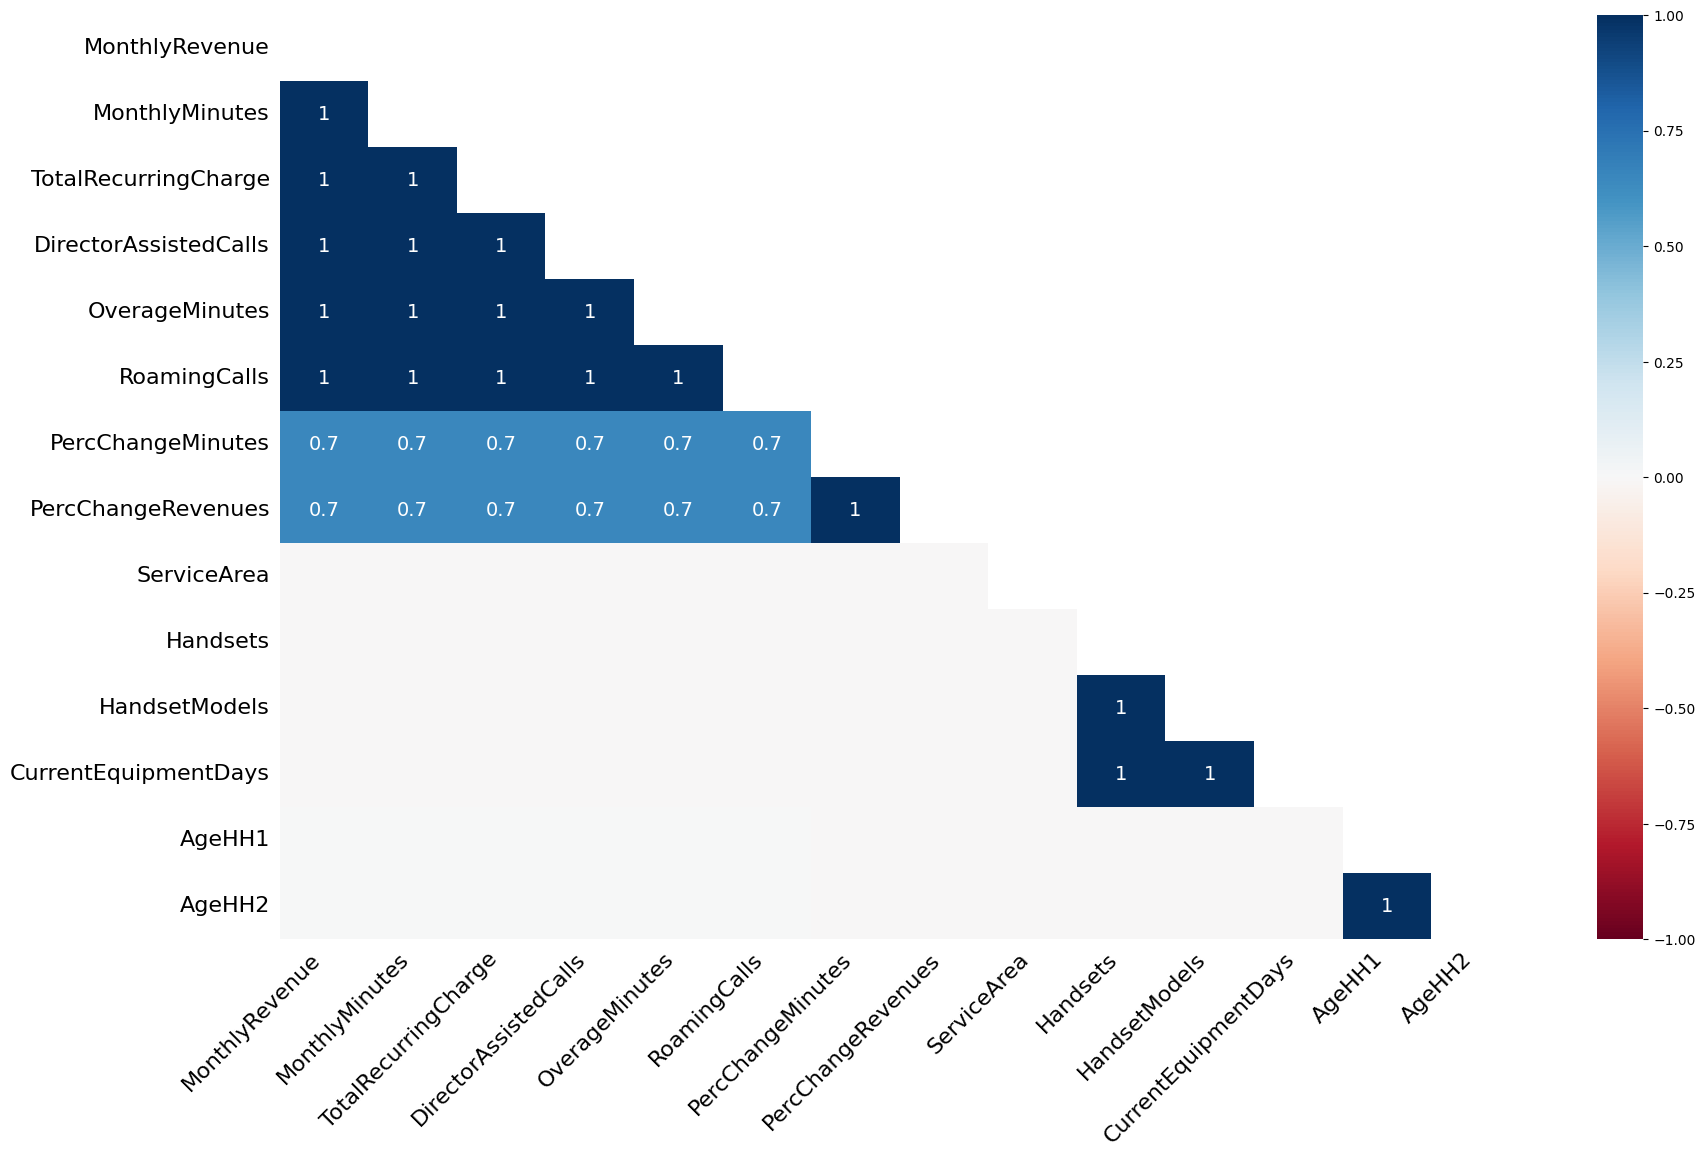

In [ ]:
# Gives a heatmap of how missing values are related
import missingno as msno
msno.heatmap(data)

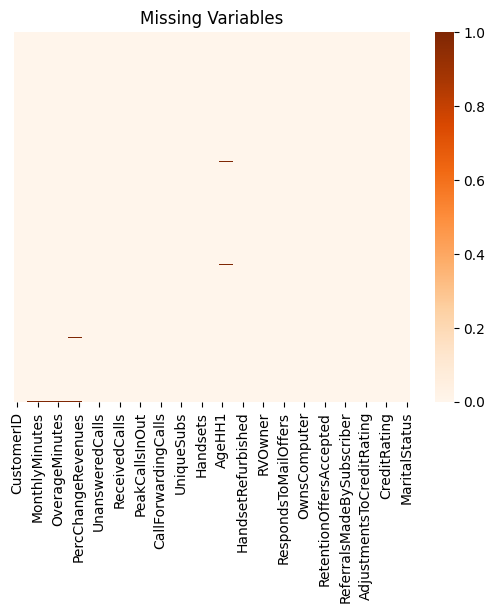

In [ ]:
#visualize missing value in data using searborn
plt.title("Missing Variables")
sns.heatmap(data.isnull(), yticklabels=False, cmap='Oranges')
plt.show()

In [ ]:
# View the number of missing value for data
na_cols = data.columns[data.isnull().sum() != 0]
data[na_cols].isnull().sum()

MonthlyRevenue           156
MonthlyMinutes           156
TotalRecurringCharge     156
DirectorAssistedCalls    156
OverageMinutes           156
RoamingCalls             156
PercChangeMinutes        367
PercChangeRevenues       367
ServiceArea               24
Handsets                   1
HandsetModels              1
CurrentEquipmentDays       1
AgeHH1                   909
AgeHH2                   909
dtype: int64

Replace missing value with zero

In [ ]:
# for column
data['MonthlyRevenue'] = data['MonthlyRevenue'].replace(np.nan, 0)

# for whole dataframe
data = data.replace(np.nan, 0)

# inplace
data.replace(np.nan, 0, inplace=True)

print(data)

       CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51042     3399958   Yes            0.00             0.0                   0.0   
51043     3399974    No           95.17          1745.0                  85.0   
51044     3399978   Yes            0.00             0.0                   0.0   
51045     3399990    No            0.00             0.0                   0.0   
51046     3399994    No            0.00             0.0                   0.0   

       DirectorAssistedCall

In [ ]:
# for column
data['MonthlyMinutes'] = data['MonthlyMinutes'].replace(np.nan, 0)

# for whole dataframe
data = data.replace(np.nan, 0)

# inplace
data.replace(np.nan, 0, inplace=True)

print(data)

       CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51042     3399958   Yes            0.00             0.0                   0.0   
51043     3399974    No           95.17          1745.0                  85.0   
51044     3399978   Yes            0.00             0.0                   0.0   
51045     3399990    No            0.00             0.0                   0.0   
51046     3399994    No            0.00             0.0                   0.0   

       DirectorAssistedCall

In [ ]:
# for column
data['TotalRecurringCharge'] = data['TotalRecurringCharge'].replace(np.nan, 0)

# for whole dataframe
data = data.replace(np.nan, 0)

# inplace
data.replace(np.nan, 0, inplace=True)

print(data)

       CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51042     3399958   Yes            0.00             0.0                   0.0   
51043     3399974    No           95.17          1745.0                  85.0   
51044     3399978   Yes            0.00             0.0                   0.0   
51045     3399990    No            0.00             0.0                   0.0   
51046     3399994    No            0.00             0.0                   0.0   

       DirectorAssistedCall

In [ ]:
data['DirectorAssistedCalls'] = data['DirectorAssistedCalls'].replace(np.nan, 0)

# for whole dataframe
data = data.replace(np.nan, 0)

# inplace
data.replace(np.nan, 0, inplace=True)

print(data)

       CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51042     3399958   Yes            0.00             0.0                   0.0   
51043     3399974    No           95.17          1745.0                  85.0   
51044     3399978   Yes            0.00             0.0                   0.0   
51045     3399990    No            0.00             0.0                   0.0   
51046     3399994    No            0.00             0.0                   0.0   

       DirectorAssistedCall

Remove Irrelavant Variables

In [ ]:
# remove customer ID, Service Area
data.drop(columns = ['CustomerID', 'ServiceArea'], inplace = True)

In [ ]:
#view data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      51047 non-null  object 
 1   MonthlyRevenue             51047 non-null  float64
 2   MonthlyMinutes             51047 non-null  float64
 3   TotalRecurringCharge       51047 non-null  float64
 4   DirectorAssistedCalls      51047 non-null  float64
 5   OverageMinutes             51047 non-null  float64
 6   RoamingCalls               51047 non-null  float64
 7   PercChangeMinutes          51047 non-null  float64
 8   PercChangeRevenues         51047 non-null  float64
 9   DroppedCalls               51047 non-null  float64
 10  BlockedCalls               51047 non-null  float64
 11  UnansweredCalls            51047 non-null  float64
 12  CustomerCareCalls          51047 non-null  float64
 13  ThreewayCalls              51047 non-null  flo

# 3. Feature Engineering & Exploratary Data Analysis

Numeric Variables Data Visualization

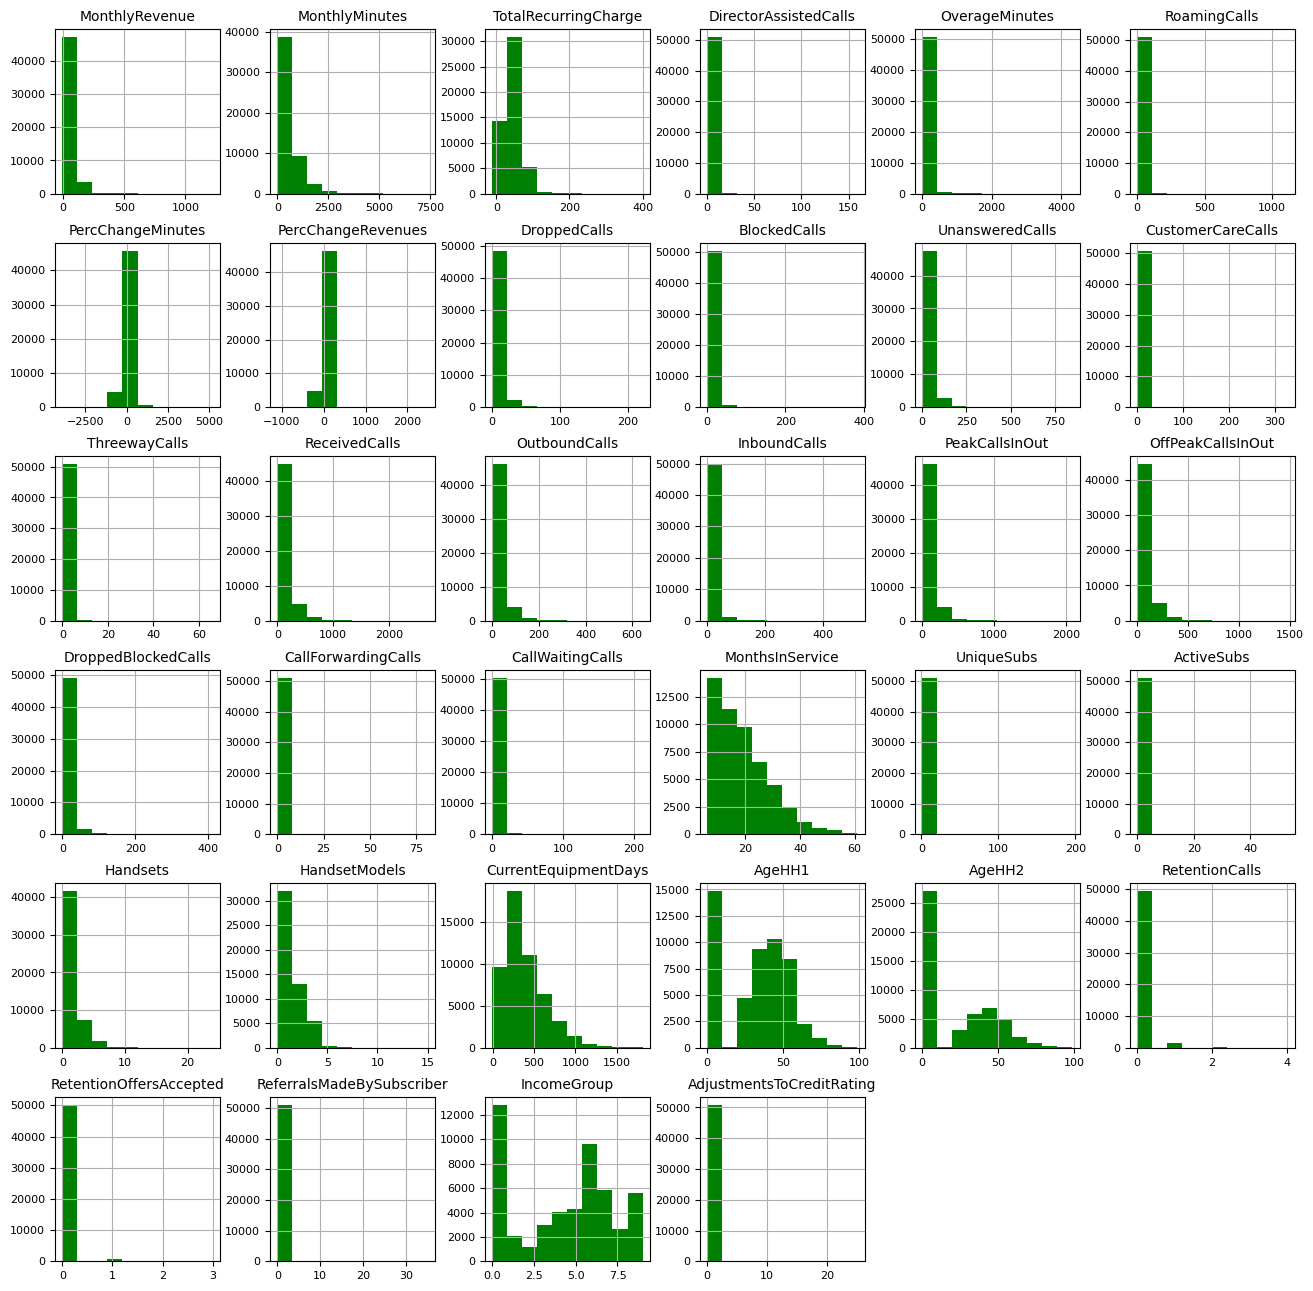

In [ ]:
import matplotlib.pyplot as plt

# Reinitialize numeric columns
num_cols = data.columns[data.dtypes != 'object']

# View the histograms of numerical features
data[num_cols].hist(figsize=(16, 16), color='green')

# Adjust the font sizes
plt.title('Histograms', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

In [ ]:
#Log transform skewed variables
skew = data[num_cols].skew().sort_values(ascending = False)
skew = skew[skew > 0.75].index.tolist()
len(skew)

30

In [ ]:
#c = columns
for c in skew:
    if data[c].min() < 0:
        data[c] = data[c] - data[c].min()
    data[c] = data[c].apply(np.log1p)

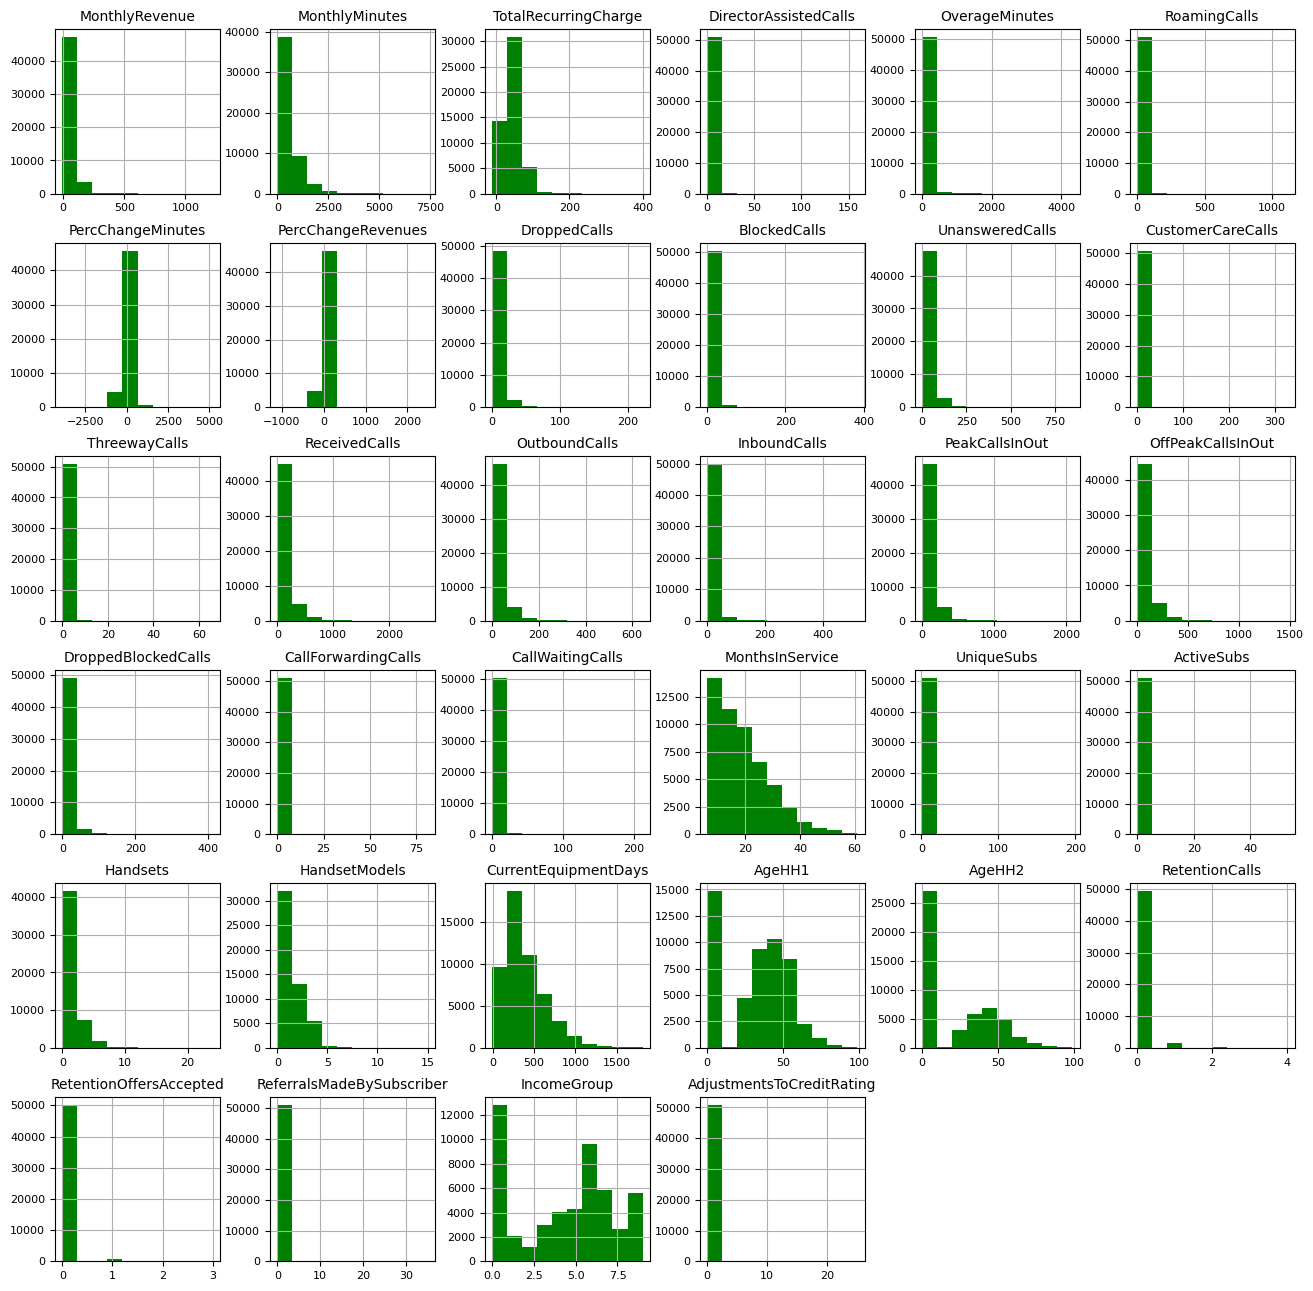

In [ ]:
import matplotlib.pyplot as plt

# Define the parameters
params = {'axes.titlesize': '10',
          'xtick.labelsize': '8',
          'ytick.labelsize': '8'}

plt.rcParams.update(params)

# View the histograms of numerical features
data[num_cols].hist(figsize=(16, 16), color='green')

plt.show()


Binary Variables Data Visualization

In [ ]:
#Reinitialize object columns
obj_cols = data.columns[data.dtypes == 'object']

In [ ]:
#Define a group of variables for those who have Yes/No or Known/Unknown
uniq_val = pd.DataFrame([[c, len(data[c].unique())] for c in data[obj_cols].columns],
                        columns = ['Variable', 'Number']).set_index('Variable')

In [ ]:
#View on binary features - Yes/No or Known/Unknown
bin_cols = uniq_val[uniq_val.Number == 2].index.tolist()
bin_cols

['Churn',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'MadeCallToRetentionTeam']

Churn Rate

In [ ]:
#Count the Churn value (percentage)
data.Churn.value_counts(normalize = True)

No     0.711815
Yes    0.288185
Name: Churn, dtype: float64

No     0.711815
Yes    0.288185
Name: Churn, dtype: float64

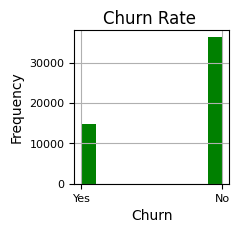

In [ ]:
import matplotlib.pyplot as plt

data.Churn.hist(figsize=(2, 2), color='green')
plt.suptitle('Churn Rate')
plt.xlabel('Churn')
plt.ylabel('Frequency')

# Churn: Yes: 1, No: 0
data.Churn.value_counts(normalize=True)


No     0.757713
Yes    0.242287
Name: ChildrenInHH, dtype: float64

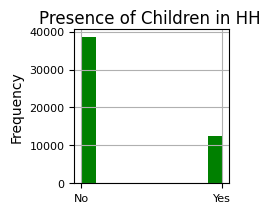

In [ ]:
import matplotlib.pyplot as plt

data.ChildrenInHH.hist(figsize=(2, 2), color='green')
plt.suptitle('Presence of Children in HH')
plt.ylabel('Frequency')

data.ChildrenInHH.value_counts(normalize=True)


No     0.861089
Yes    0.138911
Name: HandsetRefurbished, dtype: float64

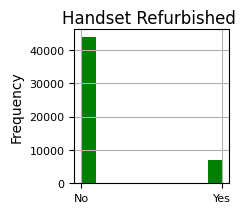

In [ ]:
#HandsetRefurbished
data.HandsetRefurbished.hist(figsize = (2, 2), color='green');
plt.suptitle('Handset Refurbished');
plt.ylabel('Frequency');

data.HandsetRefurbished.value_counts(normalize = True)

Yes    0.902031
No     0.097969
Name: HandsetWebCapable, dtype: float64

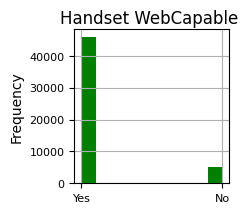

In [ ]:
#HandsetWebCapable
data.HandsetWebCapable.hist(figsize = (2, 2), color='green');
plt.suptitle('Handset WebCapable');
plt.ylabel('Frequency');

data.HandsetWebCapable.value_counts(normalize = True)

No     0.813446
Yes    0.186554
Name: TruckOwner, dtype: float64

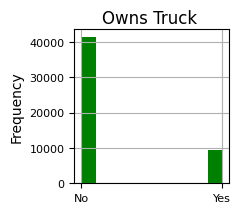

In [ ]:
#TruckOwner
data.TruckOwner.hist(figsize = (2, 2), color='green');
plt.suptitle('Owns Truck');
plt.ylabel('Frequency');

data.TruckOwner.value_counts(normalize = True)

No     0.918644
Yes    0.081356
Name: RVOwner, dtype: float64

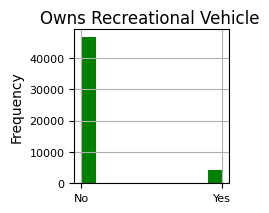

In [ ]:
#RVOwner
data.RVOwner.hist(figsize = (2, 2), color='green');
plt.suptitle('Owns Recreational Vehicle');
plt.ylabel('Frequency');

data.RVOwner.value_counts(normalize = True)

Known      0.665798
Unknown    0.334202
Name: Homeownership, dtype: float64

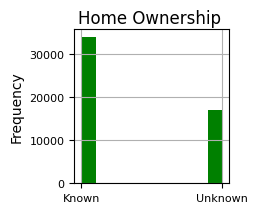

In [ ]:
#Homeownership
data.Homeownership.hist(figsize = (2, 2), color='green');
plt.suptitle('Home Ownership');
plt.ylabel('Frequency');

data.Homeownership.value_counts(normalize = True)

No     0.638549
Yes    0.361451
Name: BuysViaMailOrder, dtype: float64

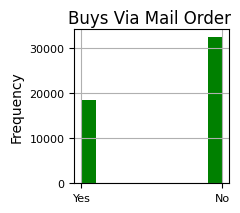

In [ ]:
#BuysViaMailOrder
data.BuysViaMailOrder.hist(figsize = (2, 2), color='green');
plt.suptitle('Buys Via Mail Order');
plt.ylabel('Frequency');

data.BuysViaMailOrder.value_counts(normalize = True)

No     0.623367
Yes    0.376633
Name: RespondsToMailOffers, dtype: float64

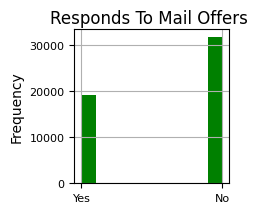

In [ ]:
#RespondsToMailOffers
data.RespondsToMailOffers.hist(figsize = (2, 2), color='green');
plt.suptitle('Responds To Mail Offers');
plt.ylabel('Frequency');

data.RespondsToMailOffers.value_counts(normalize = True)

No     0.985268
Yes    0.014732
Name: OptOutMailings, dtype: float64

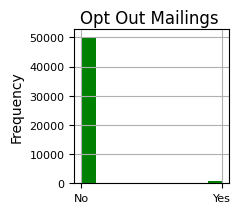

In [ ]:
#OptOutMailings
data.OptOutMailings.hist(figsize = (2, 2), color='green');
plt.suptitle('Opt Out Mailings');
plt.ylabel('Frequency');

data.OptOutMailings.value_counts(normalize = True)

No     0.943601
Yes    0.056399
Name: NonUSTravel, dtype: float64

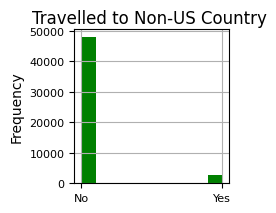

In [ ]:
#NonUSTravel
data.NonUSTravel.hist(figsize = (2, 2), color='green');
plt.suptitle('Travelled to Non-US Country');
plt.ylabel('Frequency');

data.NonUSTravel.value_counts(normalize = True)

No     0.814602
Yes    0.185398
Name: OwnsComputer, dtype: float64

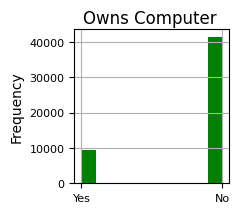

In [ ]:
#OwnsComputer
data.OwnsComputer.hist(figsize = (2, 2), color='green');
plt.suptitle('Owns Computer');
plt.ylabel('Frequency');

data.OwnsComputer.value_counts(normalize = True)

Yes    0.675907
No     0.324093
Name: HasCreditCard, dtype: float64

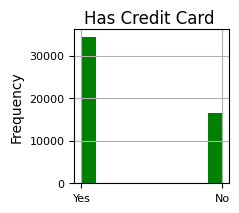

In [ ]:
#HasCreditCard
data.HasCreditCard.hist(figsize = (2, 2),color='green');
plt.suptitle('Has Credit Card');
plt.ylabel('Frequency');

data.HasCreditCard.value_counts(normalize = True)

No     0.80755
Yes    0.19245
Name: NewCellphoneUser, dtype: float64

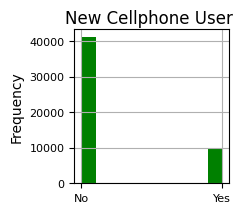

In [ ]:
#NewCellphoneUser
data.NewCellphoneUser.hist(figsize = (2, 2), color='green');
plt.suptitle('New Cellphone User');
plt.ylabel('Frequency');

data.NewCellphoneUser.value_counts(normalize = True)

No     0.862186
Yes    0.137814
Name: NotNewCellphoneUser, dtype: float64

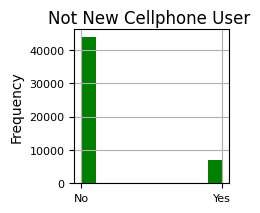

In [ ]:
#NotNewCellphoneUser
data.NotNewCellphoneUser.hist(figsize = (2, 2), color='green');
plt.suptitle('Not New Cellphone User');
plt.ylabel('Frequency');

data.NotNewCellphoneUser.value_counts(normalize = True)

No     0.986699
Yes    0.013301
Name: OwnsMotorcycle, dtype: float64

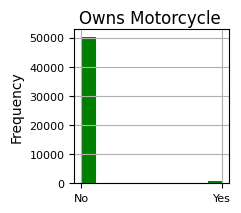

In [ ]:
#OwnsMotorcycle
data.OwnsMotorcycle.hist(figsize = (2, 2), color='green');
plt.suptitle('Owns Motorcycle');
plt.ylabel('Frequency');

data.OwnsMotorcycle.value_counts(normalize = True)

No     0.965816
Yes    0.034184
Name: MadeCallToRetentionTeam, dtype: float64

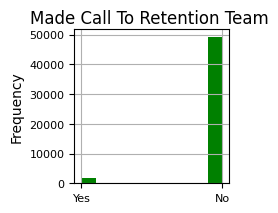

In [ ]:
#MadeCallToRetentionTeam
data.MadeCallToRetentionTeam.hist(figsize = (2, 2), color='green');
plt.suptitle('Made Call To Retention Team');
plt.ylabel('Frequency');

data.MadeCallToRetentionTeam.value_counts(normalize = True)

Categorical Variables Data Visualization

In [ ]:
#Other categorical features
#Ordinal variable - a categorical variable for which the possible values are ordered
cat_cols = uniq_val[uniq_val.Number > 2].index.tolist()
cat_cols

['HandsetPrice', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']

In [ ]:
#HandsetPrice
data.HandsetPrice.value_counts(normalize = True)

Unknown    0.567751
30         0.143554
150        0.080612
130        0.041237
80         0.038396
10         0.037769
60         0.034791
200        0.024801
100        0.024193
40         0.004878
400        0.000901
250        0.000392
300        0.000255
180        0.000196
500        0.000157
240        0.000118
Name: HandsetPrice, dtype: float64

2-High       0.372069
1-Highest    0.166944
3-Good       0.164750
5-Low        0.127314
4-Medium     0.104943
7-Lowest     0.041413
6-VeryLow    0.022567
Name: CreditRating, dtype: float64

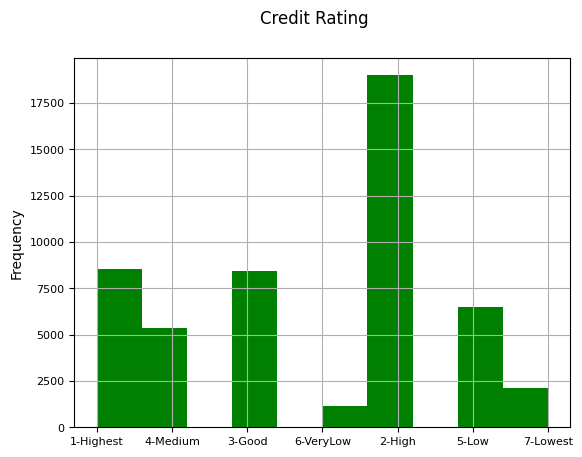

In [ ]:
import matplotlib.pyplot as plt

data.CreditRating.hist(color='green')
plt.suptitle('Credit Rating')
plt.ylabel('Frequency')

data.CreditRating.value_counts(normalize=True)


Other       0.482986
Suburban    0.320842
Town        0.148667
Rural       0.047505
Name: PrizmCode, dtype: float64

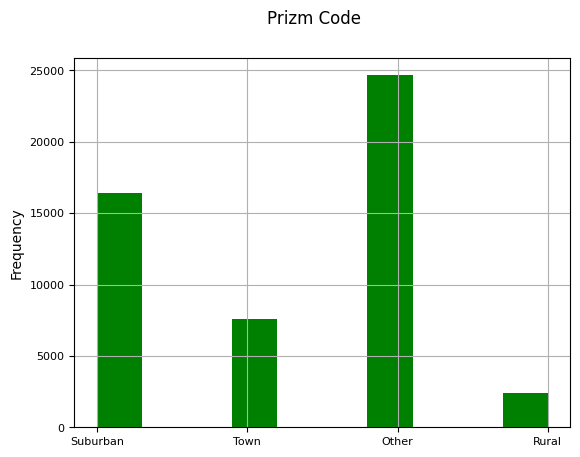

In [ ]:
import matplotlib.pyplot as plt

data.PrizmCode.hist(color='green')
plt.suptitle('Prizm Code')
plt.ylabel('Frequency')

data.PrizmCode.value_counts(normalize=True)


Other           0.737301
Professional    0.171509
Crafts          0.029757
Clerical        0.019316
Self            0.017219
Retired         0.014359
Student         0.007464
Homemaker       0.003076
Name: Occupation, dtype: float64

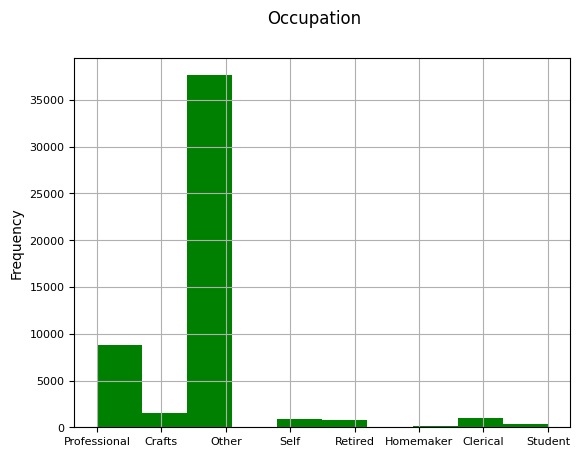

In [ ]:
import matplotlib.pyplot as plt

data.Occupation.hist(color='green')
plt.suptitle('Occupation')
plt.ylabel('Frequency')

data.Occupation.value_counts(normalize=True)


Unknown    0.385919
Yes        0.365369
No         0.248712
Name: MaritalStatus, dtype: float64

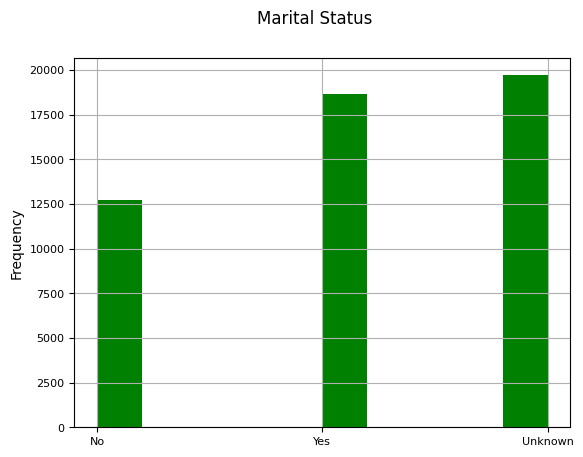

In [ ]:
#MaritalStatus
data.MaritalStatus.hist(color='green');
plt.suptitle('Marital Status');
plt.ylabel('Frequency');

data.MaritalStatus.value_counts(normalize = True)

Label Encoder

In [ ]:
#Import Label Encoder
from sklearn.preprocessing import LabelEncoder

#Define variable for label Encoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df

In [ ]:
#Apply Label Encoder on data
data = FunLabelEncoder(data)

#Check the information of the data
data.info()

#Locate the info as examples - dataset.iloc[row, column]
data.iloc[235:300,:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      51047 non-null  int64  
 1   MonthlyRevenue             51047 non-null  float64
 2   MonthlyMinutes             51047 non-null  float64
 3   TotalRecurringCharge       51047 non-null  float64
 4   DirectorAssistedCalls      51047 non-null  float64
 5   OverageMinutes             51047 non-null  float64
 6   RoamingCalls               51047 non-null  float64
 7   PercChangeMinutes          51047 non-null  float64
 8   PercChangeRevenues         51047 non-null  float64
 9   DroppedCalls               51047 non-null  float64
 10  BlockedCalls               51047 non-null  float64
 11  UnansweredCalls            51047 non-null  float64
 12  CustomerCareCalls          51047 non-null  float64
 13  ThreewayCalls              51047 non-null  flo

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
235,1,64.80,479.0,50.0,0.00,139.0,0.0,-337.0,-13.3,0.7,...,0,3,0,0,8,0,0,2,4,2
236,1,17.14,3.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,0,9,0,0,15,0,0,2,3,2
237,0,124.06,2955.0,82.0,0.00,421.0,0.0,262.0,20.0,23.0,...,0,0,0,1,14,0,0,2,3,1
238,0,80.28,1245.0,68.0,1.24,73.0,0.0,-160.0,-62.1,0.0,...,0,6,0,3,0,0,2,0,4,2
239,0,100.05,820.0,85.0,3.46,0.0,17.5,2.0,-16.1,8.7,...,0,8,0,0,0,0,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,95.30,894.0,52.0,2.48,30.0,28.4,146.0,-10.0,9.0,...,0,0,0,0,3,0,2,0,3,1
296,0,104.29,1005.0,105.0,0.99,2.0,3.7,-145.0,1.9,5.0,...,0,0,0,0,8,0,0,0,3,1
297,0,95.27,815.0,95.0,1.49,0.0,0.0,-350.0,-7.0,9.3,...,0,5,0,0,0,0,0,0,3,1
298,0,79.84,596.0,75.0,1.73,8.0,0.0,-38.0,-0.9,8.0,...,0,9,0,0,3,0,0,2,3,2


In [ ]:
#Reinitialize binary features
bin_cols = uniq_val[uniq_val.Number == 2].index.tolist()
bin_cols

['Churn',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'MadeCallToRetentionTeam']

In [ ]:
#Reinitialize binary features
bin_cols = uniq_val[uniq_val.Number == 2].index.tolist()
bin_cols

['Churn',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'MadeCallToRetentionTeam']

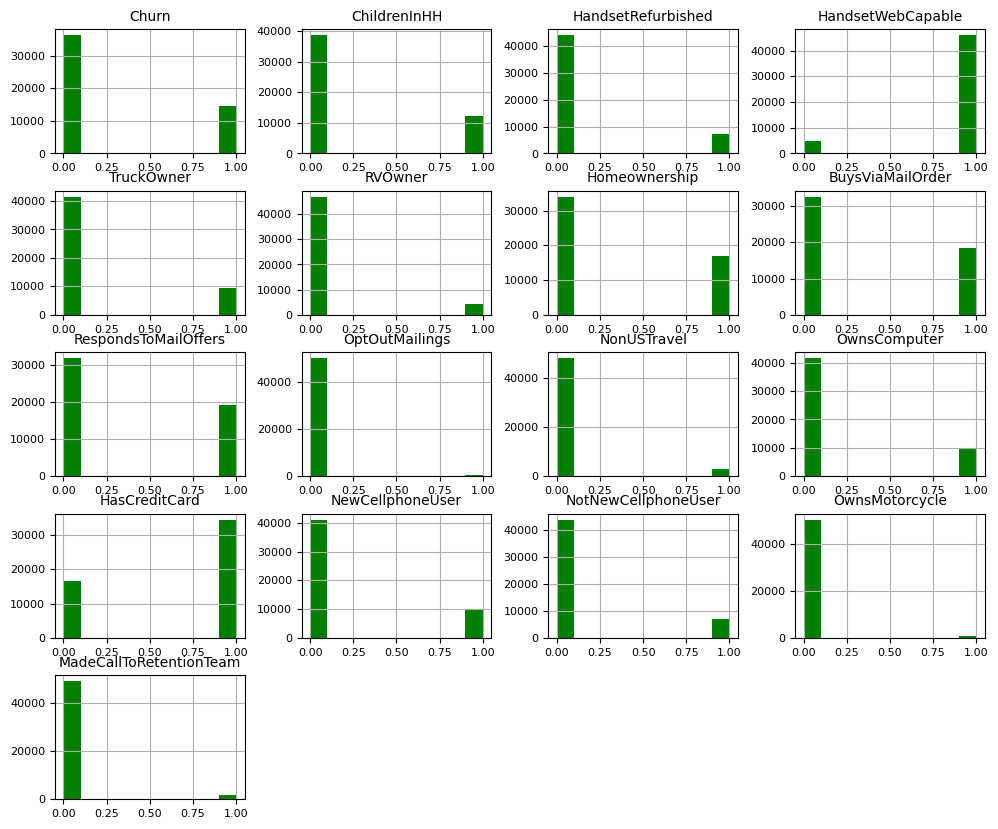

In [ ]:
#Plot distribution of binary variables
data[bin_cols].hist(figsize = (12, 10), color='green');

In [ ]:
#Reinitialize categorical features
cat_cols = uniq_val[uniq_val.Number > 2].index.tolist()
cat_cols

['HandsetPrice', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']

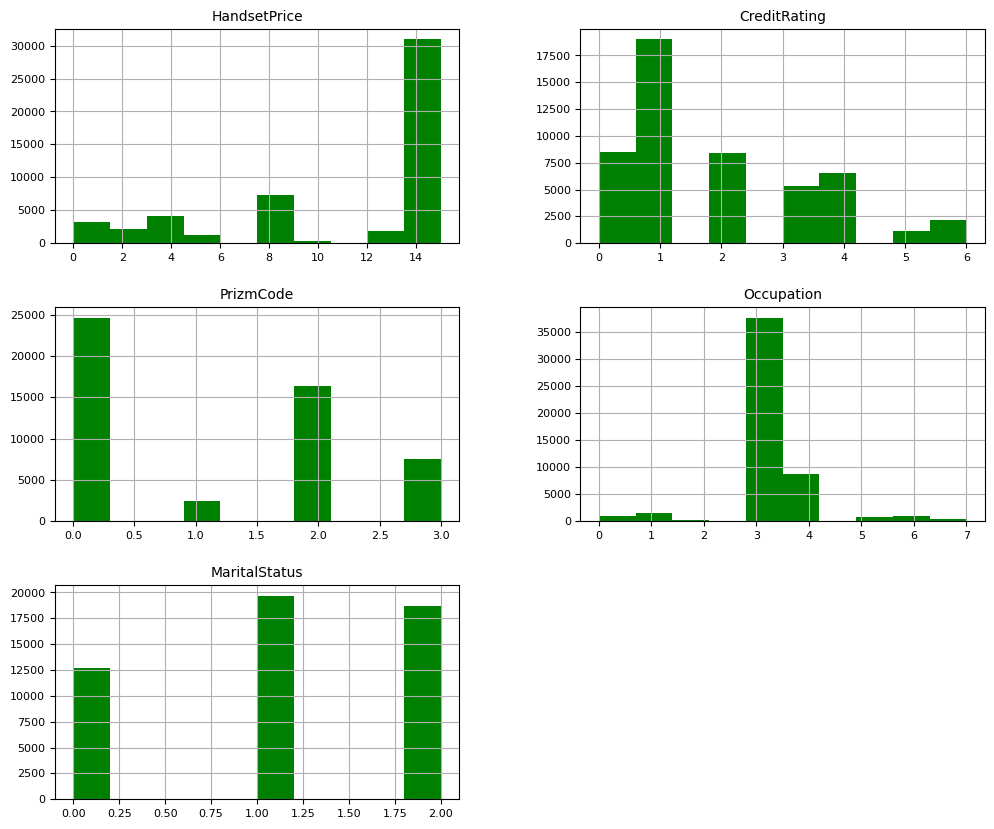

In [ ]:
#Plot distribution of categorical variables
data[cat_cols].hist(figsize = (12, 10), color='green');

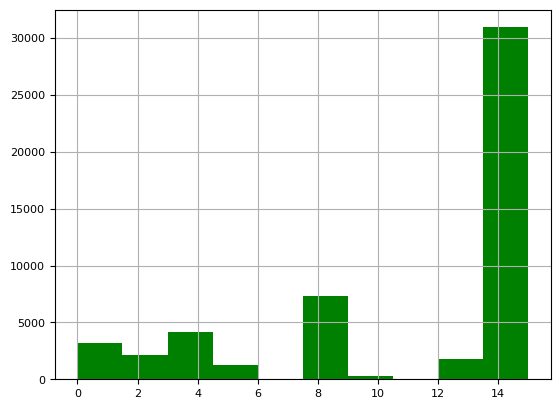

In [ ]:
#Plot distribution of handset price
data.HandsetPrice.hist(color='green');

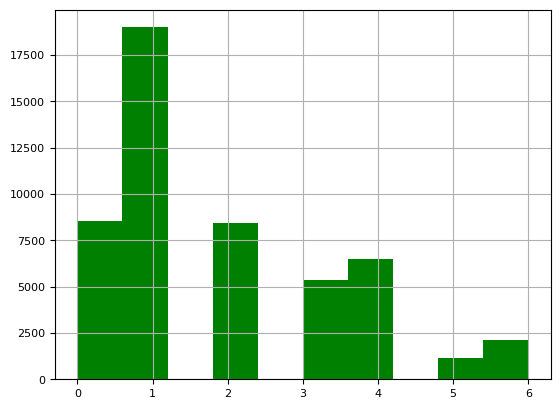

In [ ]:
#Plot distribution of credit rating
data.CreditRating.hist(color='green');

Data Normalization
* To make all the values are now between the range 0 to 1.
* This process makes the training process less sensitive to the scale of the features. This results in getting better coefficients after training.

These are two methods to normalize data in Python under sklearn:
1. normalize()
2. MinMaxScaler

In [ ]:
#before normalizationD
data.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,4,0,0,8,1,0,2,4,0
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,5,0,0,8,0,3,2,4,2
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,6,0,0,15,0,2,3,1,2
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,6,0,0,0,0,3,0,3,0
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,0,9,0,1,0,0,0,0,4,2


In [ ]:
#Import preprocessing and MinMaxScaler
from sklearn import preprocessing

#Normalize data in data set
scaler = preprocessing.MinMaxScaler()
data_names = data.columns
train_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(train_data, columns=data_names)
scaled_data.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,1.0,0.024537,0.029759,0.080292,0.001568,0.0,0.0,0.410058,0.303158,0.003157,...,0.0,0.444444,0.0,0.00,0.533333,1.0,0.000000,0.666667,0.571429,0.0
1,1.0,0.018836,0.001359,0.068127,0.000000,0.0,0.0,0.426933,0.308448,0.001353,...,0.0,0.555556,0.0,0.00,0.533333,0.0,0.500000,0.666667,0.571429,1.0
2,0.0,0.035924,0.001087,0.119221,0.000000,0.0,0.0,0.427153,0.308448,0.000000,...,0.0,0.666667,0.0,0.00,1.000000,0.0,0.333333,1.000000,0.142857,1.0
3,0.0,0.071937,0.178285,0.209246,0.007780,0.0,0.0,0.444690,0.310704,0.234551,...,0.0,0.666667,0.0,0.00,0.000000,0.0,0.500000,0.000000,0.428571,0.0
4,1.0,0.018958,0.000000,0.068127,0.000000,0.0,0.0,0.427374,0.308393,0.000000,...,0.0,1.000000,0.0,0.04,0.000000,0.0,0.000000,0.000000,0.571429,1.0


In [ ]:
#Print scaled data dimensions
print(scaled_data.shape)

(51047, 56)


In [ ]:
#To have a view of the number of people that "churn"
#Churn : Yes:1 , No:0
scaled_data['Churn'].value_counts()

0.0    36336
1.0    14711
Name: Churn, dtype: int64

Check Imbalanced Churn Rate

<Axes: title={'center': 'Without Downsampling'}, ylabel='Churn'>

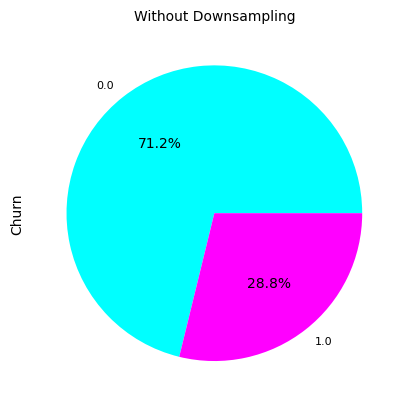

In [ ]:
#Using a pie chart for visualization
scaled_data.groupby('Churn').size().plot(kind = 'pie',
                                       y = "Churn",
                                       label = "Churn",
                                       autopct ='%1.1f%%',
                                       title = "Without Downsampling",
                                       cmap = "cool")

In [ ]:
#Separate the two churn rates

not_churn = scaled_data[scaled_data['Churn'] == 0.0]
churn  = scaled_data[scaled_data['Churn'] == 1.0]

print(not_churn.shape)
print(churn.shape)

(36336, 56)
(14711, 56)


Spilt Data
- Split data into Train,validation, Test Set

In [ ]:
#Define x and y
X = scaled_data.copy()
y = scaled_data.Churn


In [ ]:
# train test split for training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(40837, 56)
(10210, 56)


In [ ]:
# train test split for training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_val.shape)

(32669, 56)
(8168, 56)


In [ ]:
#Check the dimensions of training set, validation set and testing set
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(32669, 56)
(8168, 56)
(10210, 56)
(32669,)
(8168,)
(10210,)


<Axes: title={'center': 'Without sampling'}, ylabel='Churn'>

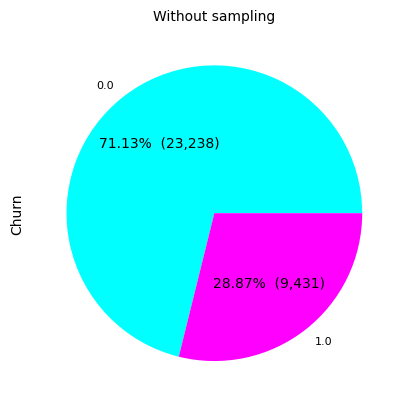

In [ ]:
#Using a pie chart for visualization
X_train.groupby('Churn').size().plot(kind = 'pie',
                                       y = "Churn",
                                       label = "Churn",
                                       autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(X_train.groupby('Churn').size())/100),
                                       title = "Without sampling",
                                       cmap = "cool")

In [ ]:
#Separate the two churn rates

not_churn = X_train[X_train['Churn'] == 0.0]
has_churn  = X_train[X_train['Churn'] == 1.0]

print(not_churn.shape)
print(has_churn.shape)

(23238, 56)
(9431, 56)


In [ ]:
X_train.drop(columns = ['Churn'], inplace = True)
X_val.drop(columns = ['Churn'], inplace = True)
X_test.drop(columns = ['Churn'], inplace = True)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(32669, 55)
(8168, 55)
(10210, 55)
(32669,)
(8168,)
(10210,)


Down-Sampling
* Randomly filter out some of the majority cases to have balanced churn rate

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train, y_train = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 9431
Before OverSampling, counts of label '0': 23238 

After OverSampling, the shape of train_X: (46476, 55)
After OverSampling, the shape of train_y: (46476,) 

After OverSampling, counts of label '1': 23238
After OverSampling, counts of label '0': 23238


In [ ]:
#Check the dimensions of training set, validation set and testing set
print('after SMOTE on training set')
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

after SMOTE on training set
(46476, 55)
(8168, 55)
(10210, 55)
(46476,)
(8168,)
(10210,)


<Axes: title={'center': 'After SMOTE'}, ylabel='Churn'>

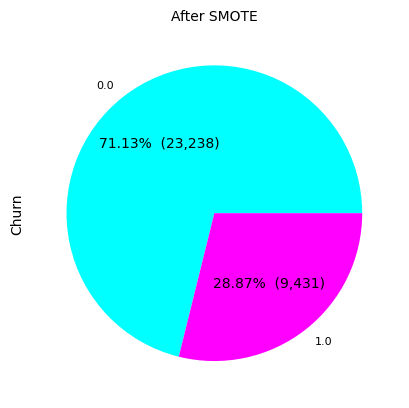

In [ ]:
#Using a pie chart for visualization
y_train.value_counts().plot(kind = 'pie',
                                       y = "Churn",
                                       label = "Churn",
                                       autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(y_train.value_counts())/100),
                                       title = "After SMOTE",
                                       cmap = "cool")

# Modeling

# Load necessary Lib

Preparing Model
* Import needed **library**



In [ ]:
# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout, MaxPool1D, GlobalMaxPooling1D,GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
import keras

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import f1_score, accuracy_score, roc_curve, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, precision_score, auc

In [ ]:
from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

In [ ]:
def drow_history(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+ metric])
    plt.title('model '+metric)
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

# CNN-VAE

In [ ]:
# cut the data to fit each batch size
# Adjust the size of input arrays X and y to fit a given batch size.
# Ensures that the number of samples in the arrays is divisible by the batch size,
# which is often required in machine learning models that use batch-based training.
def cut_array_to_fit_batchsize(X,y,batch_size):
    n_size = (len(X)//batch_size)*batch_size

    X = X[0:n_size]

    y = y[0:n_size]
    return X, y

In [ ]:
batch_size = 100

X_train, y_train = cut_array_to_fit_batchsize(X_train,y_train, batch_size)
X_val, y_val = cut_array_to_fit_batchsize(X_val, y_val, batch_size)

X_test,y_test = cut_array_to_fit_batchsize(X_test,y_test, batch_size)
print (X_val.shape, X_train.shape)

(8100, 55) (46400, 55)


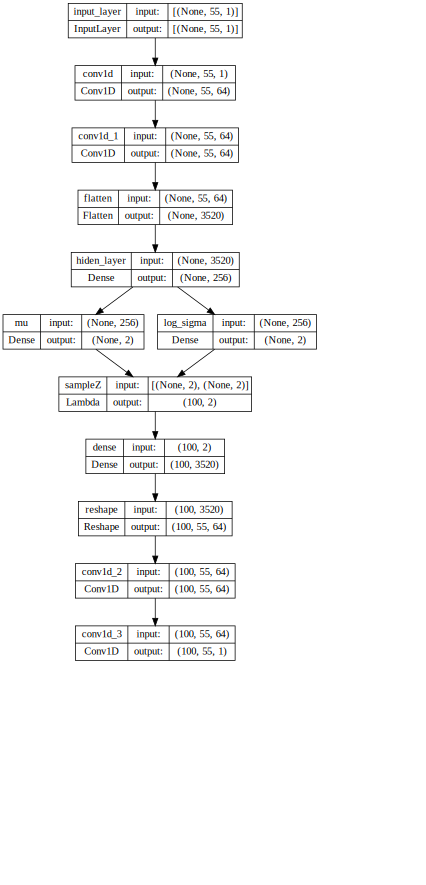

In [ ]:
from keras.layers import Input, Dense, Lambda, Conv1D, Flatten, Reshape
from keras.models import Model
from keras.losses import binary_crossentropy
from keras.callbacks import LearningRateScheduler
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import EarlyStopping, ModelCheckpoint

import keras.backend as K
from numpy.random import seed
seed(1)

# Define input layer
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,1), name='input_layer')

# Define Encoder layers (1D CNN)
num_filters = 64
filter_size = 3
encoded = Conv1D(num_filters, filter_size, activation='relu', padding='same')(input_layer)
encoded = Conv1D(num_filters, filter_size, activation='relu', padding='same')(encoded)
encoded = Flatten()(encoded)
hiden_layer_dim = 256
hiden_layer = Dense(hiden_layer_dim, activation='linear', name='hiden_layer')(encoded)

# Create 2 dense layer that outputs latent space dimention data
latent_space_dim = 2
mu = Dense(latent_space_dim, activation='linear', name='mu')(hiden_layer)
log_sigma = Dense(latent_space_dim, activation='linear', name='log_sigma')(hiden_layer)

# Encoder model, to encode input into latent variable
# We choose mu, the mean of the output as can be seen in the samle_z function.
# the mean is the center point, the representative of the gaussian
encoder = Model(input_layer, mu, name='encoder')

# Now the trick of the vae, to sample from the 2 dense layers
def sample_z(args):
    mu, log_sigma = args
    eps = K.random_normal(shape=(batch_size, latent_space_dim), mean=0., stddev=1.)
    return mu + K.exp(log_sigma / 2) * eps


# Sample from the output of the 2 dense layers
sampleZ = Lambda(sample_z, name='sampleZ', output_shape=(latent_space_dim,))([mu, log_sigma])

# Define decoder layers in VAE model
decoder_hidden = Dense(hiden_layer_dim, activation='linear', name='decoder_hidden')
decoded = Dense(num_filters*(input_dim), activation='relu')(sampleZ)
decoded = Reshape((input_dim, num_filters))(decoded)
decoded = Conv1D(num_filters, filter_size, activation='relu', padding='same')(decoded)
decoder_out = Conv1D(1, filter_size, activation='sigmoid', padding='same')(decoded)

# VAE model, Unsupervised leraning for reconstruction of the input data
vae = Model(input_layer, decoder_out, name='vae')

# Define a separate Decoder model, that recostruct data from latent variable
# The decoder model uses eights that was trained with the VAE mode;,
# We need a separate model, if we want to generate data from given data in latent space.
decoder_input = Input(shape=(latent_space_dim,), name='decoder_input')
decoded = decoder_hidden(decoder_input)
decoded = Dense(num_filters*(input_dim), activation='relu')(decoded)
decoded = Reshape((input_dim, num_filters))(decoded)
decoded = Conv1D(num_filters, filter_size, activation='relu', padding='same')(decoded)
decoder_out = Conv1D(1, filter_size, activation='sigmoid', padding='same')(decoded)

decoder = Model(decoder_input, decoder_out, name = 'decoder')
SVG(model_to_dot(vae, show_shapes='true').create(prog='dot', format='svg'))

In [ ]:
# Loss Function
def vae_loss(y_true, y_pred):
    """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
    recon = K.sum(K.binary_crossentropy(y_pred, y_true), axis=1)
    kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)

    return recon + kl

In [ ]:
# Callback function
from keras.callbacks import Callback
vlos = float(10000.)

class SaveBest(Callback):
    global vlos
    vlos = float(10000.)

    def on_epoch_end(self, batch, logs={}):
        global vlos
        tmp = logs.get('val_loss')
        if (tmp==None):
            tmp = 1000.

        if (vlos - float(tmp) > 0.000001) :
            print ('loss improved from: ', vlos, ' to: ', tmp, 'saving models')
            vlos = float(tmp)
            encoder.save('drive/My Drive/FYP/c2c/best_encoder.h5')
            decoder.save('drive/My Drive/FYP/c2c/best_decoder.h5')
            vae.save('drive/My Drive/FYP/c2c/best_vae.h5')

In [ ]:
# Reshape
X_train_3d = X_train.to_numpy()
X_val_3d = X_val.to_numpy()
X_test_3d = X_test.to_numpy()

X_train_3d = X_train_3d.reshape (X_train.shape[0], X_train.shape[1], 1)
X_val_3d = X_val_3d.reshape (X_val.shape[0], X_val.shape[1], 1)
X_test_3d = X_test_3d.reshape (X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# run the vae
savebest = SaveBest()
vae.compile(optimizer='adam', loss=vae_loss, experimental_run_tf_function=False)
vae_history = vae.fit(X_train_3d, X_train_3d, batch_size=batch_size, shuffle=True,
                      validation_data = (X_val_3d, X_val_3d),
                    epochs=200, callbacks = [EarlyStopping(monitor='loss',patience = 8), savebest])

Train on 46400 samples, validate on 8100 samples
Epoch 1/200
46400/46400 [==============================] - ETA: 0s - loss: 66.4284

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


loss improved from:  10000.0  to:  42.683766306182484 saving models
46400/46400 [==============================] - 50s 1ms/sample - loss: 66.4284 - val_loss: 42.6838
Epoch 2/200
46400/46400 [==============================] - 34s 732us/sample - loss: 40.8784 - val_loss: 42.2033
Epoch 3/200
46400/46400 [==============================] - 32s 683us/sample - loss: 40.5192 - val_loss: 41.4866
Epoch 4/200
46400/46400 [==============================] - 35s 744us/sample - loss: 40.2698 - val_loss: 41.4242
Epoch 5/200
46400/46400 [==============================] - 33s 705us/sample - loss: 40.2076 - val_loss: 41.3558
Epoch 6/200
46400/46400 [==============================] - 33s 713us/sample - loss: 40.1693 - val_loss: 41.2671
Epoch 7/200
46400/46400 [==============================] - 34s 734us/sample - loss: 40.1209 - val_loss: 41.2653
Epoch 8/200
46400/46400 [==============================] - 34s 742us/sample - loss: 40.1049 - val_loss: 41.2524
Epoch 9/200
46400/46400 [=========================

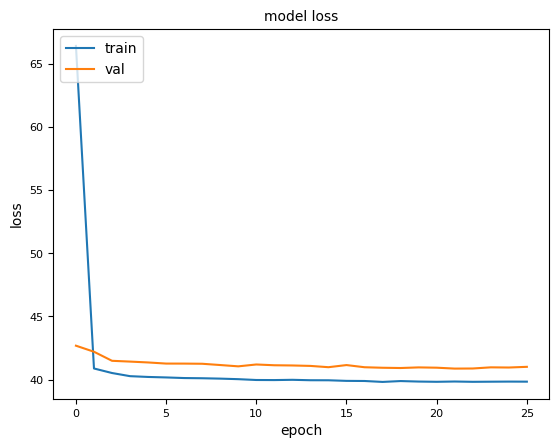

In [ ]:
drow_history(vae_history, 'loss')

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Text(0.5, 1.0, 'Reconstruction error - Train set')

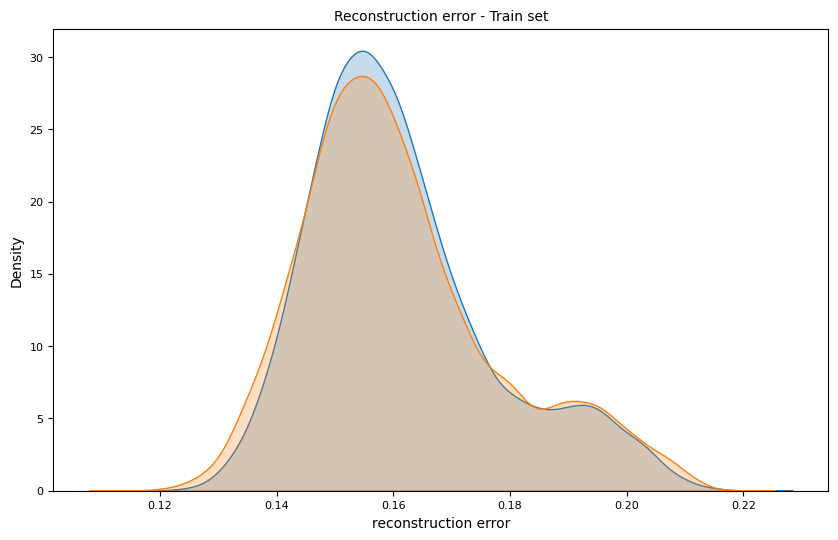

In [ ]:
x_train_encoded = encoder.predict(X_train_3d)

pred_train = decoder.predict(x_train_encoded)
mse = np.mean(np.power(X_train_3d - pred_train, 2), axis=1)
error_df = pd.DataFrame({'recon_error': np.squeeze(mse),
                        'churn': y_train})

plt.figure(figsize=(10,6))
sns.kdeplot(error_df.recon_error[error_df.churn==0], label='not churn', fill=True, clip=(0,10))
sns.kdeplot(error_df.recon_error[error_df.churn==1], label='churn', fill=True, clip=(0,10))
plt.xlabel('reconstruction error');
plt.title('Reconstruction error - Train set')

Text(0.5, 1.0, 'Reconstruction error - Val set')

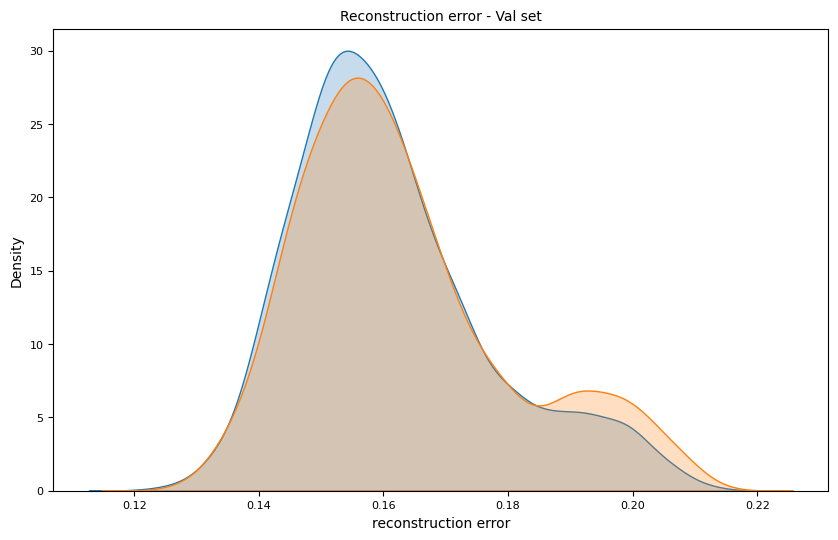

In [ ]:
x_val_encoded = encoder.predict(X_val_3d)

pred = decoder.predict(x_val_encoded)
mseV = np.mean(np.power(X_val_3d - pred, 2), axis=1)
error_df = pd.DataFrame({'recon_error': np.squeeze(mseV),
                        'churn': y_val})

plt.figure(figsize=(10,6))
sns.kdeplot(error_df.recon_error[error_df.churn==0], label='not churn', fill=True, clip=(0,10))
sns.kdeplot(error_df.recon_error[error_df.churn==1], label='churn', fill=True, clip=(0,10))
plt.xlabel('reconstruction error');
plt.title('Reconstruction error - Val set')

Text(0.5, 1.0, 'Reconstruction error - test set')

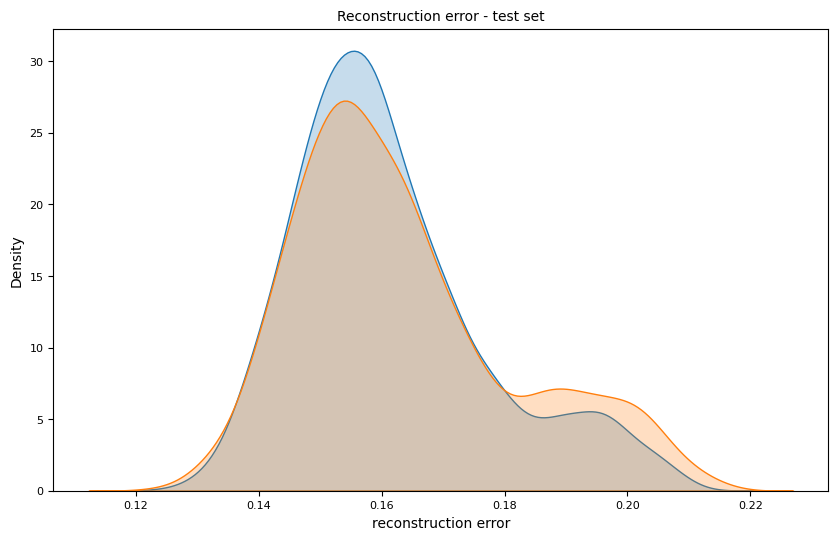

In [ ]:
x_test_encoded = encoder.predict(X_test_3d)

pred = decoder.predict(x_test_encoded)
mseV = np.mean(np.power(X_test_3d - pred, 2), axis=1)
error_df = pd.DataFrame({'recon_error': np.squeeze(mseV),
                        'churn': y_test})

plt.figure(figsize=(10,6))
sns.kdeplot(error_df.recon_error[error_df.churn==0], label='not churn', fill=True, clip=(0,10))
sns.kdeplot(error_df.recon_error[error_df.churn==1], label='churn', fill=True, clip=(0,10))
plt.xlabel('reconstruction error');
plt.title('Reconstruction error - test set')

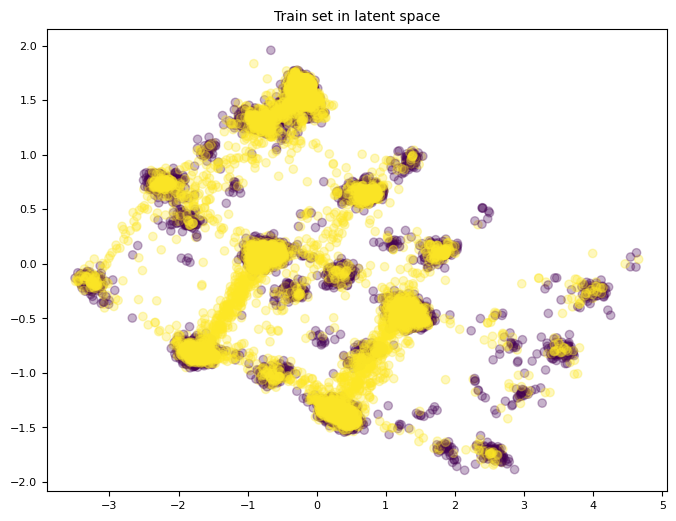

In [ ]:
x_train_encoded = encoder.predict(X_train_3d)

plt.figure(figsize=(8, 6))
plt.scatter(x_train_encoded[:, 0], x_train_encoded[:, 1],
            c=y_train, alpha=0.3)
plt.title('Train set in latent space')
plt.show()

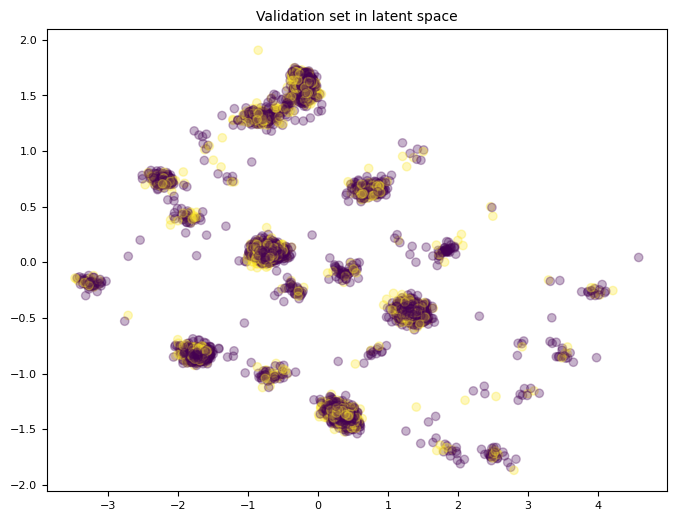

In [ ]:
x_val_encoded = encoder.predict(X_val_3d)

plt.figure(figsize=(8, 6))
plt.scatter(x_val_encoded[:, 0], x_val_encoded[:, 1],
            c=y_val, alpha=0.3)

plt.title('Validation set in latent space')
plt.show()

In [ ]:
x_test_encoded = encoder.predict(X_test_3d)

In [ ]:
# Reshape the output given by vae
X_train_3d_encoded = x_train_encoded.reshape (x_train_encoded.shape[0], x_train_encoded.shape[1], 1)
X_val_3d_encoded = x_val_encoded.reshape (x_val_encoded.shape[0], x_val_encoded.shape[1], 1)
X_test_3d_encoded = x_test_encoded.reshape (x_test_encoded.shape[0], x_test_encoded.shape[1], 1)

In [ ]:
# train the cnn model
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
call = EarlyStopping(monitor= 'loss', patience = 3)
epochs = 50

model = Sequential()
model.add(Conv1D(filters=32, kernel_size = 2, activation='relu', input_shape=(2, 1)))
model.add(Dense(256, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

history = model.fit(X_train_3d_encoded, y_train, epochs=epochs, validation_data=(X_val_3d_encoded, y_val), verbose=1, callbacks = [call])

Train on 46400 samples, validate on 8100 samples
Epoch 1/50
45664/46400 [============================>.] - ETA: 0s - loss: 0.6928 - accuracy: 0.5086

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


46400/46400 [==============================] - 3s 57us/sample - loss: 0.6928 - accuracy: 0.5083 - val_loss: 0.6951 - val_accuracy: 0.3791
Epoch 2/50
46400/46400 [==============================] - 3s 56us/sample - loss: 0.6919 - accuracy: 0.5178 - val_loss: 0.6888 - val_accuracy: 0.4828
Epoch 3/50
46400/46400 [==============================] - 3s 70us/sample - loss: 0.6917 - accuracy: 0.5202 - val_loss: 0.6841 - val_accuracy: 0.5204
Epoch 4/50
46400/46400 [==============================] - 3s 68us/sample - loss: 0.6915 - accuracy: 0.5199 - val_loss: 0.6896 - val_accuracy: 0.4256
Epoch 5/50
46400/46400 [==============================] - 2s 51us/sample - loss: 0.6910 - accuracy: 0.5220 - val_loss: 0.6964 - val_accuracy: 0.4841
Epoch 6/50
46400/46400 [==============================] - 2s 51us/sample - loss: 0.6906 - accuracy: 0.5257 - val_loss: 0.6925 - val_accuracy: 0.5136
Epoch 7/50
46400/46400 [==============================] - 2s 50us/sample - loss: 0.6902 - accuracy: 0.5268 - val_loss

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 1, 32)             96        
                                                                 
 dense_2 (Dense)             (None, 1, 256)            8448      
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 8,801
Trainable params: 8,801
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


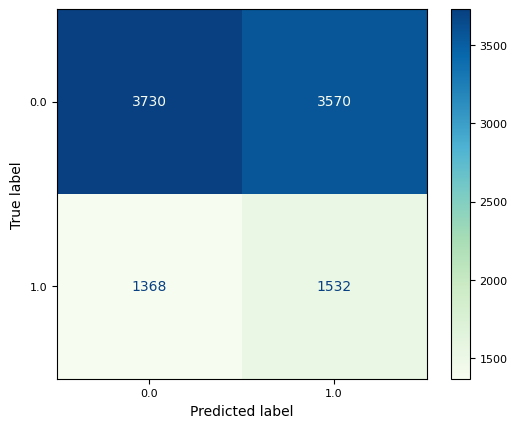

classification report
              precision    recall  f1-score   support

         0.0     0.7317    0.5110    0.6017      7300
         1.0     0.3003    0.5283    0.3829      2900

    accuracy                         0.5159     10200
   macro avg     0.5160    0.5196    0.4923     10200
weighted avg     0.6090    0.5159    0.5395     10200



In [ ]:
#Calculate Metrics
accuracy = []
recall =[]
roc_auc= []
precision = []
f1 = []
y_pred2 = model.predict(X_test_3d_encoded)
accuracy.append(round(accuracy_score(y_test, np.round(y_pred2)),4))
recall.append(round(recall_score(y_test, np.round(y_pred2)),4))
roc_auc.append(round(roc_auc_score(y_test, np.round(y_pred2)),4))
precision.append(round(precision_score(y_test, np.round(y_pred2)),4))
f1.append(round(f1_score(y_test, np.round(y_pred2)),4))

cm = confusion_matrix(y_test, np.round(y_pred2), labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.GnBu)
plt.show()

print("classification report")
print(classification_report(y_test, np.round(y_pred2), digits=4))


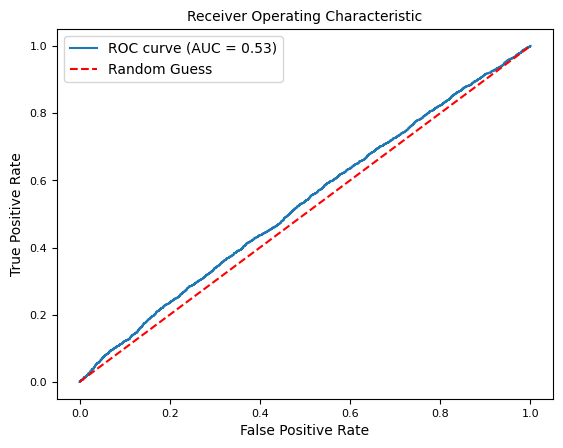

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()


# 3 Base Model ML Grid Search
Find the best params for Logistic Regression, Decision Tree, SVM

In [ ]:
+mport numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D, Dense
from keras.utils import to_categorical
from sklearn.metrics import make_scorer, f1_score

In [ ]:
# Stratified cross-validation for hyperparameter tuning
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score

# Define the logistic regression model
logreg_model = LogisticRegression(random_state=42, class_weight='balanced')

# Define the parameter grid to search over
param_grid = {
    'C': [0.01, 0.1, 1.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000, 1500],
}

# Create a function to compute the F1-score for class 1
scorer = make_scorer(f1_score, average=None, labels=[1])

# Define the stratified cross-validation object
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Define the grid search object
logreg_grid = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=cv, scoring=scorer, refit=True)

# Fit the grid search object to the data
logreg_grid.fit(X_train, y_train)

# Get the best model
logreg_best_model = logreg_grid.best_estimator_

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", logreg_grid.best_params_)
print("Corresponding score: ", logreg_grid.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best hyperparameters:  {'C': 1.0, 'max_iter': 1500, 'penalty': 'l1', 'solver': 'saga'}
Corresponding score:  0.6013391561236674


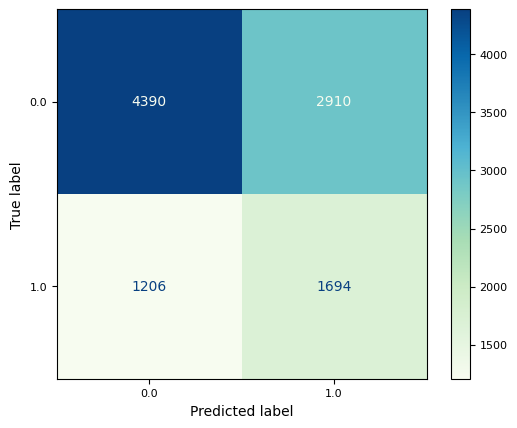

classification report
              precision    recall  f1-score   support

         0.0     0.7845    0.6014    0.6808      7300
         1.0     0.3679    0.5841    0.4515      2900

    accuracy                         0.5965     10200
   macro avg     0.5762    0.5928    0.5662     10200
weighted avg     0.6661    0.5965    0.6156     10200



In [ ]:
#Calculate Metrics
accuracy = []
recall =[]
roc_auc= []
precision = []
f1 = []
logreg_ypred2 = logreg_best_model.predict(X_test)
accuracy.append(round(accuracy_score(y_test, logreg_ypred2),4))
recall.append(round(recall_score(y_test, logreg_ypred2),4))
roc_auc.append(round(roc_auc_score(y_test, logreg_ypred2),4))
precision.append(round(precision_score(y_test, logreg_ypred2),4))
f1.append(round(f1_score(y_test, logreg_ypred2),4))

cm = confusion_matrix(y_test, logreg_ypred2, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.GnBu)
plt.show()

print("classification report")
print(classification_report(y_test, logreg_ypred2, digits=4))


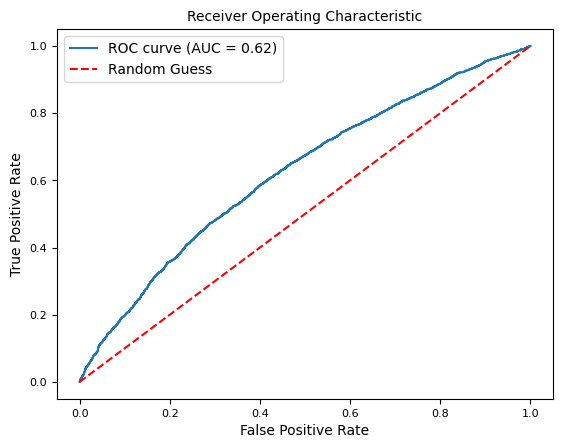

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_scores = logreg_best_model.predict_proba(X_test)[:,1]
# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
import numpy as np

# Define the decision tree model
tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Define the parameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None]
}

scorer = make_scorer(f1_score, average='weighted')

# Define the stratified cross-validation object
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Define the grid search object
dt_grid1 = GridSearchCV(estimator=tree, param_grid=param_grid, cv=cv, scoring=scorer)

# Fit the grid search object to the data
dt_grid1.fit(X_train, y_train)

dt_best_model1 = dt_grid1.best_estimator_

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", dt_grid1.best_params_)
print("Corresponding score: ", dt_grid1.best_score_)

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Corresponding score:  0.7128749178756262


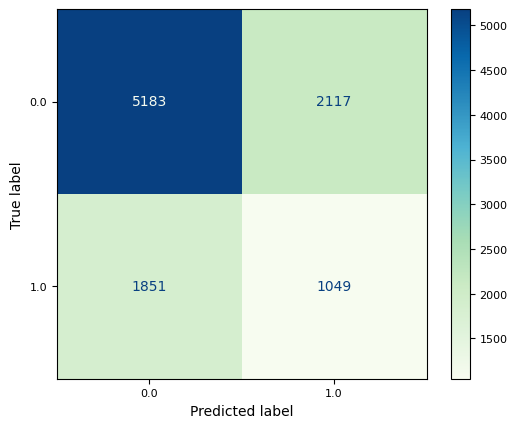

classification report
              precision    recall  f1-score   support

         0.0     0.7368    0.7100    0.7232      7300
         1.0     0.3313    0.3617    0.3459      2900

    accuracy                         0.6110     10200
   macro avg     0.5341    0.5359    0.5345     10200
weighted avg     0.6216    0.6110    0.6159     10200



In [ ]:
#Calculate Metrics
accuracy = []
recall =[]
roc_auc= []
precision = []
f1 = []
dt_ypred1 = dt_best_model1.predict(X_test)
accuracy.append(round(accuracy_score(y_test, dt_ypred1),4))
recall.append(round(recall_score(y_test, dt_ypred1),4))
roc_auc.append(round(roc_auc_score(y_test, dt_ypred1),4))
precision.append(round(precision_score(y_test, dt_ypred1),4))
f1.append(round(f1_score(y_test, dt_ypred1),4))

cm = confusion_matrix(y_test, dt_ypred1, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.GnBu)
plt.show()

print("classification report")
print(classification_report(y_test, dt_ypred1, digits=4))


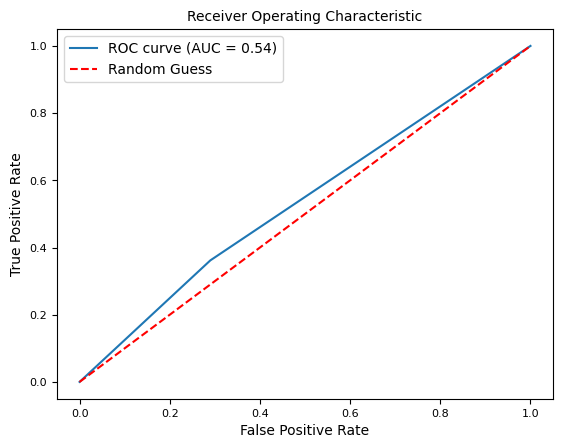

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_scores = dt_best_model1.predict_proba(X_test)[:,1]
# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()


In [ ]:
from sklearn.svm import SVC

# Define the SVM model
svm_model = SVC(random_state=42, class_weight='balanced')

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create a function to compute the F1-score for class 1
scorer = make_scorer(f1_score, average=None, labels=[1])

# Define the stratified cross-validation object
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Define the grid search object
svm_grid = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=cv, scoring=scorer, refit=True)

# Fit the grid search object to the data
svm_grid.fit(X_train, y_train)

# Get the best model
svm_best_model = svm_grid.best_estimator_

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", svm_grid.best_params_)
print("Corresponding score: ", svm_grid.best_score_)

Best hyperparameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Corresponding score:  0.7087774920097191


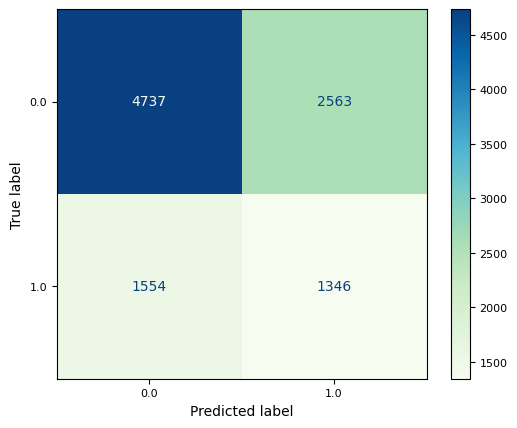

classification report
              precision    recall  f1-score   support

         0.0     0.7530    0.6489    0.6971      7300
         1.0     0.3443    0.4641    0.3954      2900

    accuracy                         0.5964     10200
   macro avg     0.5487    0.5565    0.5462     10200
weighted avg     0.6368    0.5964    0.6113     10200



In [ ]:
#Calculate Metrics
accuracy = []
recall =[]
roc_auc= []
precision = []
f1 = []
svm_ypred2 = svm_best_model.predict(X_test)
accuracy.append(round(accuracy_score(y_test, svm_ypred2),4))
recall.append(round(recall_score(y_test, svm_ypred2),4))
roc_auc.append(round(roc_auc_score(y_test, svm_ypred2),4))
precision.append(round(precision_score(y_test, svm_ypred2),4))
f1.append(round(f1_score(y_test, svm_ypred2),4))

cm = confusion_matrix(y_test, svm_ypred2, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.GnBu)
plt.show()

print("classification report")
print(classification_report(y_test, svm_ypred2, digits=4))


In [ ]:
from sklearn.svm import SVC

# Define the SVM model
svm_model = SVC(random_state=42, class_weight='balanced', C=10, gamma='scale', kernel='rbf', probability=True)

# Fit the grid search object to the data
svm_model.fit(X_train, y_train)

SVC(C=10, class_weight='balanced', probability=True, random_state=42)

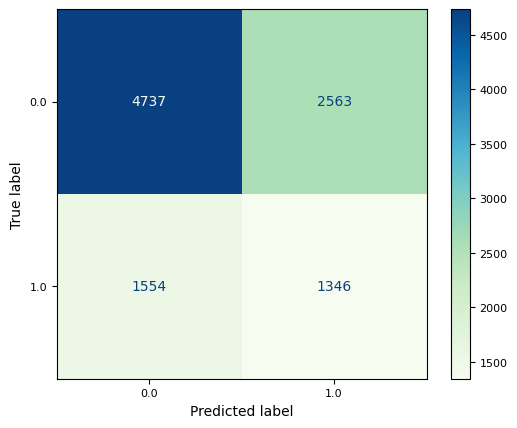

classification report
              precision    recall  f1-score   support

         0.0     0.7530    0.6489    0.6971      7300
         1.0     0.3443    0.4641    0.3954      2900

    accuracy                         0.5964     10200
   macro avg     0.5487    0.5565    0.5462     10200
weighted avg     0.6368    0.5964    0.6113     10200



In [ ]:
#Calculate Metrics
accuracy = []
recall =[]
roc_auc= []
precision = []
f1 = []
svm_ypred2 = svm_model.predict(X_test)
accuracy.append(round(accuracy_score(y_test, svm_ypred2),4))
recall.append(round(recall_score(y_test, svm_ypred2),4))
roc_auc.append(round(roc_auc_score(y_test, svm_ypred2),4))
precision.append(round(precision_score(y_test, svm_ypred2),4))
f1.append(round(f1_score(y_test, svm_ypred2),4))

cm = confusion_matrix(y_test, svm_ypred2, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.GnBu)
plt.show()

print("classification report")
print(classification_report(y_test, svm_ypred2, digits=4))

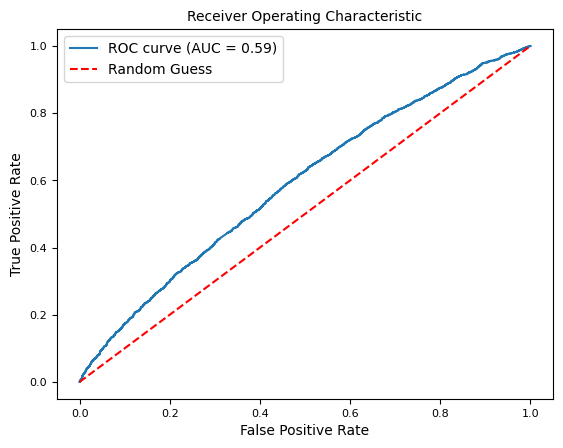

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_scores = svm_model.predict_proba(X_test)[:,1]
# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()


#Ensemble CNN+VAE, DT, LR, SVM

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D, Dense

In [ ]:
# Creating the SVM model
svm_modelBase = SVC(random_state=42,
                class_weight='balanced',
                C =  10, gamma='scale',
                kernel = 'rbf',
                probability=True)

In [ ]:
# Creating the Decision Tree Model
dt_modelBase = DecisionTreeClassifier(random_state=42,
                                  class_weight='balanced',
                                  criterion= 'gini',
                                  max_depth = None,
                                  max_features= 30,
                                  min_samples_leaf= 1,
                                  min_samples_split= 2,
                                  splitter= 'best')

In [ ]:
# Creating the LR model
logreg_modelBase = LogisticRegression(random_state=42,
                                  class_weight='balanced',
                                  C= 1.0,
                                  max_iter = 1000,
                                  penalty = 'l1',
                                  solver = 'saga',
                                  tol = 0.001
                                  )

In [ ]:
logreg_modelBase.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='saga', tol=0.001)

In [ ]:
dt_modelBase.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_features=30,
                       random_state=42)

In [ ]:
svm_modelBase.fit(X_train, y_train)

SVC(C=10, class_weight='balanced', probability=True, random_state=42)

In [ ]:
# Generating predictions from the base models
logreg_preds_val = logreg_modelBase.predict_proba(X_val)
svm_preds_val = svm_modelBase.predict_proba(X_val)
dt_preds_val = dt_modelBase.predict_proba(X_val)

In [ ]:
# Generating predictions from the 1DCNN model
cnn_preds_val = model.predict(X_val_3d_encoded)

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
# Creating the meta-learner input by combining the predictions
meta_X_val = np.concatenate([logreg_preds_val, svm_preds_val, dt_preds_val, cnn_preds_val], axis=1)

In [ ]:
# Generating predictions from the base models and the 1DCNN model for test set
logreg_preds_test = logreg_modelBase.predict_proba(X_test)
dt_preds_test = dt_modelBase.predict_proba(X_test)
svm_preds_test = svm_modelBase.predict_proba(X_test)
cnn_preds_test = model.predict(X_test_3d_encoded)

# Creating the meta-learner input for test set
meta_X_test = np.concatenate([logreg_preds_test, svm_preds_test, dt_preds_test, cnn_preds_test], axis=1)

#Grid Search for Meta Leaner
Find the best params for Catboost

In [ ]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.8 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer, f1_score

# Define the CatBoost model
catboost_metagrid = CatBoostClassifier(random_state=42, auto_class_weights="Balanced")  # Adjust class_weights as per your imbalance ratio

# Define the parameter grid to search over
param_grid = {
    'iterations': [50, 100, 150],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.1, 0.01],
}

# Create a function to compute the F1-score for class 1
scorer = make_scorer(f1_score, average=None, labels=[1])

# Define the stratified cross-validation object
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Define the grid search object
catboost_gridmeta = GridSearchCV(estimator=catboost_metagrid, param_grid=param_grid, cv=cv, scoring=scorer, refit=True)

# Fit the grid search object to the data
catboost_gridmeta.fit(meta_X_val, y_val)

# Get the best model
catboost_best_model = catboost_gridmeta.best_estimator_

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", catboost_gridmeta.best_params_)
print("Corresponding score: ", catboost_gridmeta.best_score_)

Streaming output truncated to the last 5000 lines.
52:	learn: 0.6708487	total: 513ms	remaining: 455ms
53:	learn: 0.6705833	total: 519ms	remaining: 442ms
54:	learn: 0.6703140	total: 527ms	remaining: 431ms
55:	learn: 0.6700528	total: 541ms	remaining: 425ms
56:	learn: 0.6697852	total: 552ms	remaining: 417ms
57:	learn: 0.6695338	total: 560ms	remaining: 406ms
58:	learn: 0.6692706	total: 572ms	remaining: 397ms
59:	learn: 0.6690284	total: 607ms	remaining: 404ms
60:	learn: 0.6687830	total: 623ms	remaining: 398ms
61:	learn: 0.6685193	total: 637ms	remaining: 390ms
62:	learn: 0.6682808	total: 661ms	remaining: 388ms
63:	learn: 0.6680163	total: 668ms	remaining: 376ms
64:	learn: 0.6677889	total: 676ms	remaining: 364ms
65:	learn: 0.6675423	total: 689ms	remaining: 355ms
66:	learn: 0.6673253	total: 695ms	remaining: 342ms
67:	learn: 0.6670889	total: 708ms	remaining: 333ms
68:	learn: 0.6668751	total: 720ms	remaining: 323ms
69:	learn: 0.6666280	total: 736ms	remaining: 315ms
70:	learn: 0.6664102	total: 743

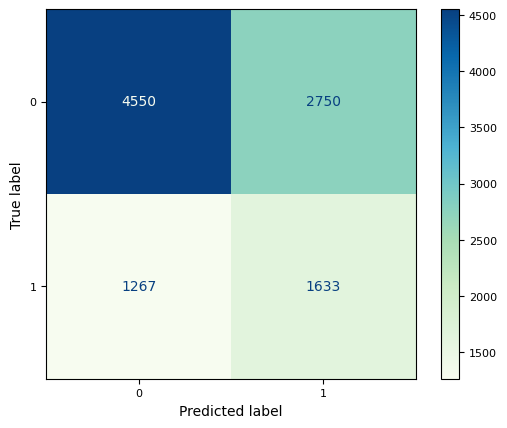

classification report
              precision    recall  f1-score   support

           0     0.7822    0.6233    0.6938      7300
           1     0.3726    0.5631    0.4484      2900

    accuracy                         0.6062     10200
   macro avg     0.5774    0.5932    0.5711     10200
weighted avg     0.6657    0.6062    0.6240     10200



In [ ]:
#Calculate Metrics
accuracy = []
recall =[]
roc_auc= []
precision = []
f1 = []
catmeta_ypred1 = catboost_best_model.predict(meta_X_test)
accuracy.append(round(accuracy_score(y_test, catmeta_ypred1),4))
recall.append(round(recall_score(y_test, catmeta_ypred1),4))
roc_auc.append(round(roc_auc_score(y_test, catmeta_ypred1),4))
precision.append(round(precision_score(y_test, catmeta_ypred1),4))
f1.append(round(f1_score(y_test, catmeta_ypred1),4))

cm = confusion_matrix(y_test, catmeta_ypred1, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.GnBu)
plt.show()

print("classification report")
print(classification_report(y_test, catmeta_ypred1, digits=4))


# CatBoost as Meta Learner

In [ ]:
# Creating the meta-learner (Logistic Regression)
meta_model_cat = CatBoostClassifier(random_state=42,
                                auto_class_weights="Balanced",
                                depth = 4,
                                iterations = 50,
                                learning_rate = 0.01
                                )

#Generating final predictions from the ensemble
#Training the meta-learner on the combined train-validation set
meta_model_cat.fit(meta_X_val, y_val)

#Generating predictions from the meta-learner for the test set
ensemble_preds_test_cat = meta_model_cat.predict(meta_X_test)

0:	learn: 0.6926637	total: 15.5ms	remaining: 761ms
1:	learn: 0.6921924	total: 34.1ms	remaining: 818ms
2:	learn: 0.6917209	total: 47.5ms	remaining: 744ms
3:	learn: 0.6912304	total: 58.9ms	remaining: 677ms
4:	learn: 0.6907744	total: 79.1ms	remaining: 712ms
5:	learn: 0.6903439	total: 89.6ms	remaining: 657ms
6:	learn: 0.6899003	total: 106ms	remaining: 649ms
7:	learn: 0.6894946	total: 115ms	remaining: 602ms
8:	learn: 0.6890764	total: 124ms	remaining: 564ms
9:	learn: 0.6886407	total: 133ms	remaining: 533ms
10:	learn: 0.6882375	total: 141ms	remaining: 499ms
11:	learn: 0.6878203	total: 151ms	remaining: 477ms
12:	learn: 0.6874397	total: 160ms	remaining: 456ms
13:	learn: 0.6870348	total: 171ms	remaining: 440ms
14:	learn: 0.6866554	total: 175ms	remaining: 408ms
15:	learn: 0.6862939	total: 190ms	remaining: 403ms
16:	learn: 0.6858937	total: 198ms	remaining: 384ms
17:	learn: 0.6855463	total: 222ms	remaining: 395ms
18:	learn: 0.6851743	total: 238ms	remaining: 388ms
19:	learn: 0.6848371	total: 247ms	r

In [ ]:
import joblib
# Save the trained model to a file
filename22 = 'drive/My Drive/FYP/c2c/metamodelcat.joblib'
joblib.dump(meta_model, filename22)

['drive/My Drive/FYP/c2c/metamodelcat.joblib']

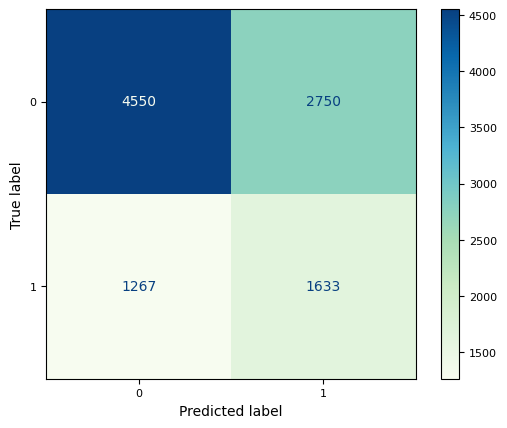

classification report
              precision    recall  f1-score   support

           0     0.7822    0.6233    0.6938      7300
           1     0.3726    0.5631    0.4484      2900

    accuracy                         0.6062     10200
   macro avg     0.5774    0.5932    0.5711     10200
weighted avg     0.6657    0.6062    0.6240     10200



In [ ]:
#Calculate Metrics
accuracy = []
recall =[]
roc_auc= []
precision = []
f1 = []
accuracy.append(round(accuracy_score(y_test, ensemble_preds_test_cat),4))
recall.append(round(recall_score(y_test, ensemble_preds_test_cat),4))
roc_auc.append(round(roc_auc_score(y_test, ensemble_preds_test_cat),4))
precision.append(round(precision_score(y_test, ensemble_preds_test_cat),4))
f1.append(round(f1_score(y_test, ensemble_preds_test_cat),4))

cm = confusion_matrix(y_test, ensemble_preds_test_cat, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.GnBu)
plt.show()

print("classification report")
print(classification_report(y_test, ensemble_preds_test_cat, digits=4))

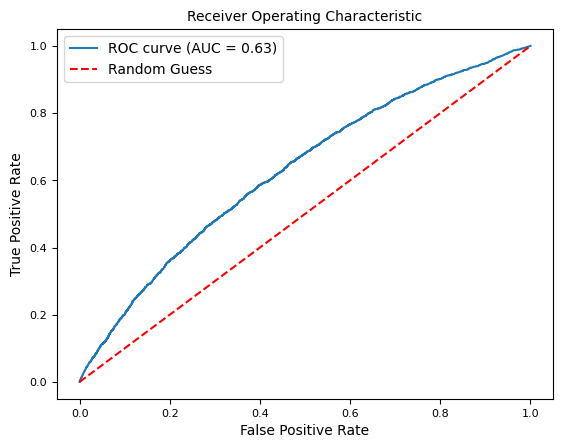

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_scores = meta_model_cat.predict_proba(meta_X_test)[:, 1]
# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()
